# Visualizing Data with Matplotlib

Let's first import some packages into our environment. Note that `%matplotlib inline` is an `IPython` magic command, which is not a part of standard Python syntax. Here `%matplotlib inline` enables the inline display of matplotlib figures so you don't need to do `plt.show()`.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

This is another `IPython` magic command that enables we to run bash commands in this environment. Let's first clone the "Motor Trend Car Road Tests" dataset. Note that the storage provided by Colab is not permanent (unless we [mount our Google Drive](https://colab.research.google.com/notebooks/io.ipynb)) so we need to be careful. If you would like to do your homework in this environment, please remember to save your work (like plotted figures) locally.

In [2]:
![ ! -f "./iris/iris.data" ] && git clone https://gist.github.com/a412dfbd88b3db70b74b.git mtcars

Cloning into 'mtcars'...
remote: Enumerating objects: 3, done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 3
Unpacking objects: 100% (3/3), done.


Now let's import the `mtcars` dataset. It's in standard CSV format with header so we can import directly. Sometimes data may be separated with tabs (or even worse a mixture of tabs and spaces) so we might need to designate a separator. Please refer to [this document](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) if you need more information.

In [3]:
cars = pd.read_csv('./mtcars/mtcars.csv')

In [4]:
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
num_cylinders = cars['cyl'].value_counts()
num_cylinders

8    14
4    11
6     7
Name: cyl, dtype: int64

Text(0, 0.5, 'Count')

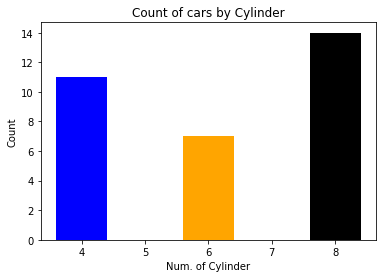

In [6]:
plt.bar(num_cylinders.keys(), num_cylinders, color=['black',  'blue', 'orange'])
plt.title('Count of cars by Cylinder')
plt.xlabel('Num. of Cylinder')
plt.ylabel('Count')

In [7]:
![ ! -f "./iris/iris.data" ] && mkdir ./iris/ && wget "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" -O ./iris/iris.data

--2020-08-09 14:54:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘./iris/iris.data’

./iris/iris.data    100%[===================>]   4.44K  --.-KB/s    in 0s      

2020-08-09 14:54:13 (217 MB/s) - ‘./iris/iris.data’ saved [4551/4551]



This dataset doesn't include the attribute names in its header so we need to specify them manually, or the first line of the file will be regarded as the header.

In [8]:
iris = pd.read_csv('./iris/iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [9]:
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,class
90,5.5,2.6,4.4,1.2,Iris-versicolor
30,4.8,3.1,1.6,0.2,Iris-setosa
88,5.6,3.0,4.1,1.3,Iris-versicolor
95,5.7,3.0,4.2,1.2,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
27,5.2,3.5,1.5,0.2,Iris-setosa
106,4.9,2.5,4.5,1.7,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica
86,6.7,3.1,4.7,1.5,Iris-versicolor
43,5.0,3.5,1.6,0.6,Iris-setosa


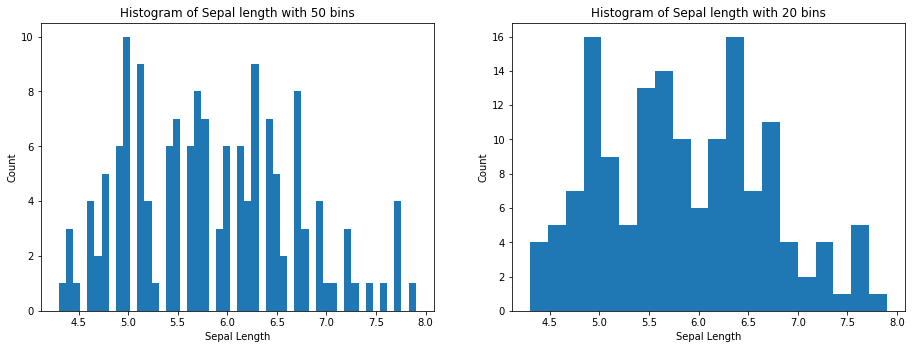

In [10]:
plt.subplot(1, 2, 1)
plt.hist(iris['sepal_length'], bins=50)
plt.xlabel('Sepal Length')
plt.ylabel('Count')
plt.title('Histogram of Sepal length with 50 bins')
plt.subplots_adjust(bottom=0, top=1, left=-0.5, right=1.5)
plt.subplot(1, 2, 2)
plt.hist(iris['sepal_length'], bins=20)
plt.xlabel('Sepal Length')
plt.ylabel('Count')
plt.title('Histogram of Sepal length with 20 bins')
plt.subplots_adjust(bottom=0, top=1, left=-0.5, right=1.5)

Text(0, 0.5, 'Count')

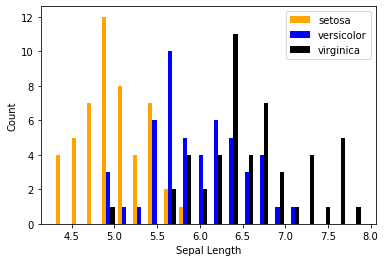

In [11]:
n_bins = 20

setosa = iris[iris['class'] == 'Iris-setosa']
versicolor = iris[iris['class'] == 'Iris-versicolor']
virginica = iris[iris['class'] == 'Iris-virginica']


colors = ['orange', 'blue', 'black']
labels = ['setosa','versicolor','virginica']
x_multi = [setosa['sepal_length'],versicolor['sepal_length'],virginica['sepal_length']]
plt.hist(x_multi, n_bins, histtype='bar',color=colors,label= labels)
plt.legend(prop={'size': 10})
plt.xlabel('Sepal Length')
plt.ylabel('Count')